In this notebook my attempt to classify a dataset available on Citrine Database and also MAP , I have classified the same 
data which has been used in  H.K.D.H. Bhadeshia, D.J.C. MacKay and L.-E. Svensson, Materials Science and Technology, 11 (1995) 1046-1051.
I have used Kernlized Support Vector Regressor and Neural Network for accomplishing this regression and  compared the techniques used as showm below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# reading the feature data file and making feature matrix 
# 16 Dimension feature space
firsthalf = open('/home/harshvaj/first half.txt')
j = firsthalf.readlines()
features = []

for i in range(0,len(j)):
    temp = j[i]
    temp = temp.split()
    ftemp = [float(x) for x in temp]
    temparray = np.array(ftemp)
    features.append(temparray)
firsthalf.close()
feats = np.array(features)

In [2]:
# reading the target data file and making target vector 
# Target is the charpy test value of the sample
secondhalf = open('/home/harshvaj/secondhalf.txt')
j = secondhalf.read()
k = j.split()
l = [float(x) for x in k]
target = np.array(l)
secondhalf.close()


In [3]:
# Normalizing inputs
maxx = feats.max(0)
minn = feats.min(0)
for i in range(1,16):
    for j in range(0,188):
        feats[j][i] = (feats[j][i]-minn[i])/(maxx[i]-minn[i])

In [4]:
#Splitting the training and validation set
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(feats, target, test_size = 80, random_state = 42)

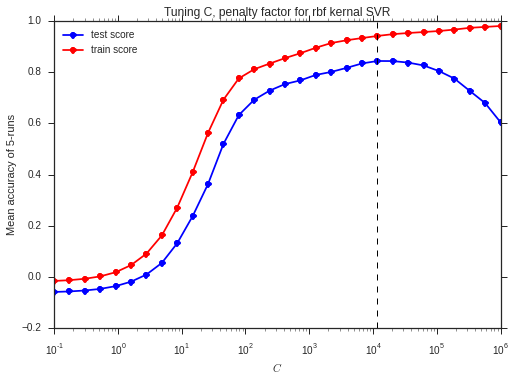

In [5]:
# Performing Non Linear Regression by rbf kernalized Support Vector Regressor
# Tuning the model parameter of rbf SVR using the training set to find best accuracy possible

from sklearn.svm import SVR
import seaborn as sns

C_range = np.logspace(-1,6,30)
repeat = 5
test_score = []
train_score = []

for c in C_range:
    # calculate accuracy for each C value in the C_range
    svreg = SVR(kernel='rbf', C=c, verbose=False)
    test_temp = 0
    train_temp = 0
    for rep in range(repeat):
        # repeating it repeat times and taking the mean score
        X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 30, random_state = rep+1)
        svreg.fit(X_train, y_train)
        train_temp= train_temp + svreg.score(X_train, y_train)
        test_temp = test_temp + svreg.score(X_test, y_test)

    test_score.append(test_temp/repeat)
    train_score.append(train_temp/repeat)
    temp1 = np.array(test_score)
    max_score = np.max(temp1)
    index = np.argmax(temp1)
    #plotting the results
with sns.axes_style("ticks"):
    plt.semilogx(C_range, test_score, marker = 'o', color = 'blue', label = 'test score')   
    plt.semilogx(C_range, train_score, marker = 'o', color = 'red', label = 'train score')
    plt.xlabel(r'$C$')
    plt.ylabel(r'Mean accuracy of %d-runs' %repeat)
    plt.legend(loc='upper left')
    plt.axvline(C_range[index], linestyle='--', color='k', linewidth=1)
    plt.title('Tuning C, penalty factor for rbf kernal SVR')
    axes = plt.gca()
    ymin, ymax = axes.get_ylim() 

In [6]:
# Initialising rbf kernalized SVR based on best C parameter and fitting training set 
regrbf = SVR(kernel='rbf', C=10000.0, verbose=False)
regrbf.fit(Xtrain,ytrain)
#predicting on test and train sets
predrbf =regrbf.predict(Xtrain)
predrbf_test = regrbf.predict(Xtest)

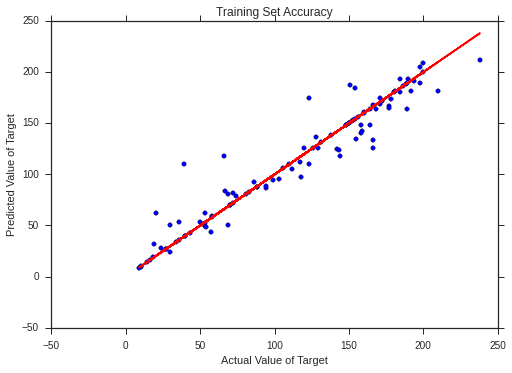

In [7]:
#Plotting the predicted v/s actual values of target
with sns.axes_style('ticks'):
    plt.scatter(ytrain, predrbf)
    plt.plot(ytrain, ytrain, color = 'red')
    plt.xlabel('Actual Value of Target')
    plt.ylabel('Predicted Value of Target')
    plt.title('Training Set Accuracy')
    
   

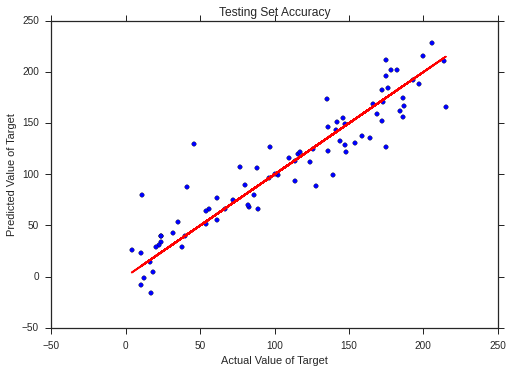

In [8]:
#Plotting the predicted v/s actual values of target
with sns.axes_style('ticks'):
    plt.scatter(ytest, predrbf_test)
    plt.plot(ytest, ytest, color = 'red')
    plt.xlabel('Actual Value of Target')
    plt.ylabel('Predicted Value of Target')
    plt.title('Testing Set Accuracy') 

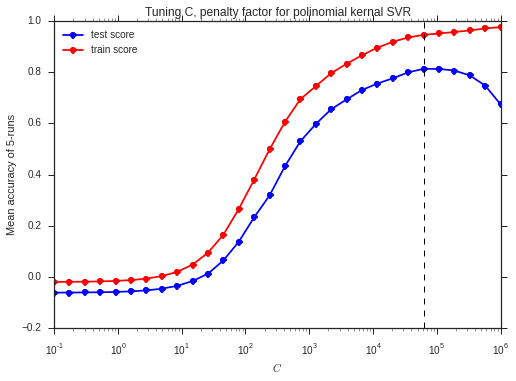

In [9]:
# Performing Non Linear Regression by polynomial kernalized Support Vector Regressor
# Tuning the model parameter of ploy SVR using the training set to find best accuracy possible

C_range = np.logspace(-1,6,30)
repeat = 5
test_score = []
train_score = []

for c in C_range:
    # calculate accuracy for each C value in the C_range
    svreg = SVR(kernel='poly', degree=3, C=c, verbose=False)
    test_temp = 0
    train_temp = 0
    for rep in range(repeat):
        # running it repeat times and taking the mean
        X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 30, random_state = rep+1)
        svreg.fit(X_train, y_train)
        train_temp= train_temp + svreg.score(X_train, y_train)
        test_temp = test_temp + svreg.score(X_test, y_test)

    test_score.append(test_temp/repeat)
    train_score.append(train_temp/repeat)
    temp1 = np.array(test_score)
    max_score = np.max(temp1)
    index = np.argmax(temp1)

    #plotting the results
with sns.axes_style("ticks"):
    plt.semilogx(C_range, test_score, marker = 'o', color = 'blue', label = 'test score')   
    plt.semilogx(C_range, train_score, marker = 'o', color = 'red', label = 'train score')
    plt.xlabel(r'$C$')
    plt.ylabel(r'Mean accuracy of %d-runs' %repeat)
    plt.legend(loc='upper left')
    plt.axvline(C_range[index], linestyle='--', color='k', linewidth=1)
    plt.title('Tuning C, penalty factor for polinomial kernal SVR')
    axes = plt.gca()
    ymin, ymax = axes.get_ylim() 

In [10]:

# Initialising rbf kernalized SVR based on best C parameter and fitting training set 
regpoly = SVR(kernel='poly', degree=3, C=10000, verbose=False)
regpoly.fit(Xtrain,ytrain)
#predicting on test and train sets
predpoly =regpoly.predict(Xtrain)
predpoly_test = regpoly.predict(Xtest)

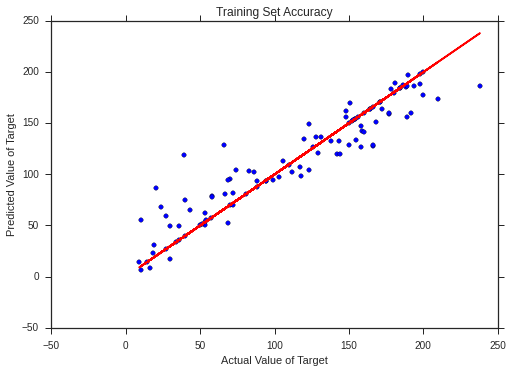

In [11]:
#Plotting the predicted v/s actual values of target
with sns.axes_style('ticks'):
    plt.scatter(ytrain, predpoly)
    plt.plot(ytrain, ytrain, color = 'red')
    plt.xlabel('Actual Value of Target')
    plt.ylabel('Predicted Value of Target')
    plt.title('Training Set Accuracy')
    
    

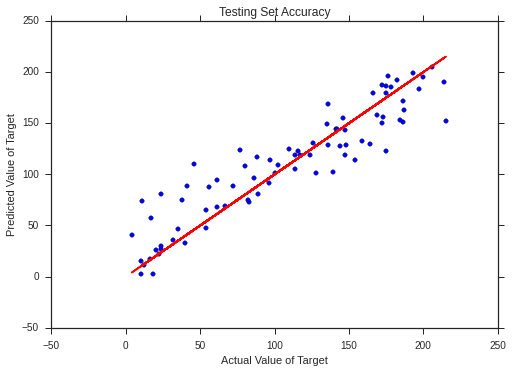

In [12]:
#Plotting the predicted v/s actual values of target
with sns.axes_style('ticks'):
    plt.scatter(ytest, predpoly_test)
    plt.plot(ytest, ytest, color = 'red')
    plt.xlabel('Actual Value of Target')
    plt.ylabel('Predicted Value of Target')
    plt.title('Testing Set Accuracy')

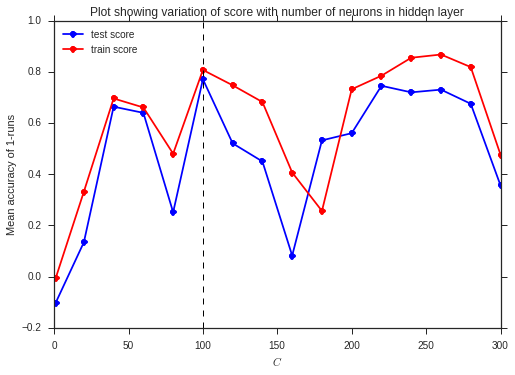

In [13]:
# Performing Non Linear Regression by  Neural Network having Sigmoid activation function in hidden layer 
# Tuning the model parameter of Hidden layer using the training set to find best accuracy possible
from sklearn.metrics import r2_score
from sknn.mlp import Regressor, Layer

C_range = np.array([1,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
repeat = 1
test_score = []

train_score = []

for c in C_range:
    Hidden = Layer('Sigmoid', name='hidden', units=c, weight_decay=.1, dropout=None, frozen=False)
    Output = Layer("Linear", name='output', units=1, weight_decay=.1, dropout=None, frozen=False)
    regnn = Regressor(layers=[Hidden, Output], warning=None, 
                      regularize='L2', weight_decay=0.0001, debug=False, verbose=None )
    
    test_temp = 0
    train_temp = 0
    for rep in range(repeat):
        X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 30, random_state = rep+1)
        regnn.fit(X_train, y_train)
        train_pred = regnn.predict(X_train)
        test_pred = regnn.predict(X_test)
        train_temp= train_temp + r2_score(y_train, train_pred)
        test_temp = test_temp + r2_score(y_test, test_pred)

    test_score.append(test_temp/repeat)
    
    train_score.append(train_temp/repeat)
    
    temp1 = np.array(test_score)
    max_score = np.max(temp1)
    index = np.argmax(temp1)
with sns.axes_style("ticks"):
    plt.plot(C_range, test_score, marker = 'o', color = 'blue', label = 'test score')   
    plt.plot(C_range, train_score, marker = 'o', color = 'red', label = 'train score')
    plt.xlabel(r'$C$')
    plt.ylabel(r'Mean accuracy of %d-runs' %repeat)
    plt.legend(loc='upper left')
    plt.axvline(C_range[index], linestyle='--', color='k', linewidth=1)
    plt.title('Plot showing variation of score with number of neurons in hidden layer')
    axes = plt.gca()
    ymin, ymax = axes.get_ylim() 

In [14]:
# Initialising Neural network with the number of units in hidden layer which give best score , and training it on train set 
Hidden = Layer('Sigmoid', name='hidden', units=100, weight_decay=.1, dropout=None, frozen=False)
Output = Layer("Linear", name='output', units=1, weight_decay=.1, dropout=None, frozen=False)
regnns = Regressor(layers=[Hidden, Output], warning=None, 
                      regularize='L2', weight_decay=0.0001, debug=False, verbose=None )
regnns.fit(Xtrain, ytrain)
prednns =regnns.predict(Xtrain)
prednns_test = regnns.predict(Xtest)

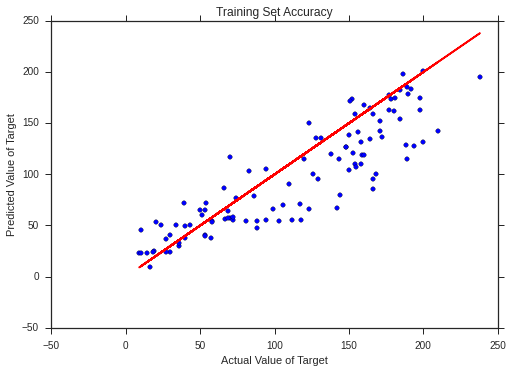

In [15]:
#Plotting the predicted v/s actual values of target
with sns.axes_style('ticks'):
    plt.scatter(ytrain, prednns)
    plt.plot(ytrain, ytrain, color = 'red')
    plt.xlabel('Actual Value of Target')
    plt.ylabel('Predicted Value of Target')
    plt.title('Training Set Accuracy')
  

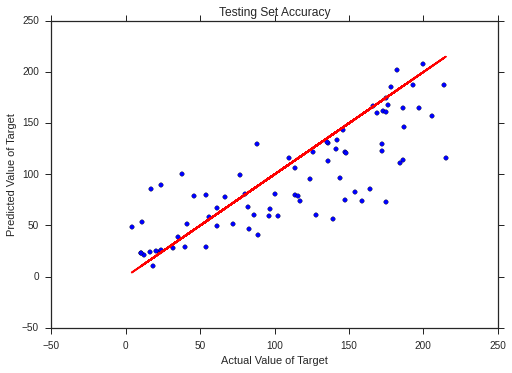

In [16]:
#Plotting the predicted v/s actual values of target
with sns.axes_style('ticks'):
    plt.scatter(ytest, prednns_test)
    plt.plot(ytest, ytest, color = 'red')
    plt.xlabel('Actual Value of Target')
    plt.ylabel('Predicted Value of Target')
    plt.title('Testing Set Accuracy')  

In [17]:
#Comparing the score of the three algo on testing data
rbfscore = regrbf.score(Xtest, ytest)
polyscore = regpoly.score(Xtest, ytest)
nnscore = r2_score(ytest, prednns_test)
print(' The R2 score of rbf kernal SVR is %f \n'% rbfscore) 
print(' The score of poly kernal SVR is %f \n The score of neural network regression is %f'%(polyscore, nnscore))

 The R2 score of rbf kernal SVR is 0.867281 
 The score of poly kernal SVR is 0.848159 
 The score of neural network regression is 0.615108
